# 📏 Model Evaluation: Classification vs Regression

This notebook summarizes and exemplifies the most important **metrics for evaluating**:

- Classification models (binary or multiclass)
- Regression models

Practical examples are provided using sklearn and matplotlib to visualize metric behavior.

## Classification - Key metrics

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = sns.load_dataset('titanic')

# Preprocessing similar to previous notebooks
df = df.drop(columns=['deck', 'embark_town', 'alive'])
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Create additional features
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

# Scale numerical variables (mean 0, variance 1)
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Select the most relevant variables
features = ['pclass', 'sex', 'age', 'fare', 'family_size', 'is_alone', 'embarked_Q', 'embarked_S']
X = df[features]
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Obtain the most useful metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Train and test the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probs for ROC AUC

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
ROC AUC: 0.8841698841698842


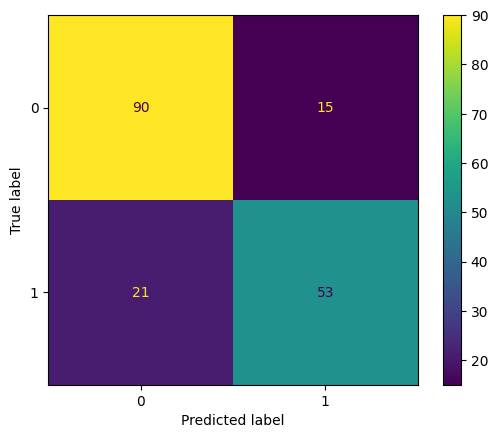

In [10]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### When to use each classification metric?

| Metric        | What does it measure?                           | When to use it                                         |
| ------------- | ----------------------------------------------- | ------------------------------------------------------ |
| **Accuracy**  | Percentage of correct predictions               | When classes are balanced                              |
| **Precision** | % of predicted positives that are correct       | If you want to avoid false positives (e.g., spam)      |
| **Recall**    | % of true positives captured                    | If you don’t want to miss any positives (e.g., cancer) |
| **F1 Score**  | Harmonic mean of precision and recall           | If you want a balance between both                     |
| **ROC AUC**   | Model’s ability to discriminate between classes | To compare classifiers in general                      |
| **Confusion matrix**   | Number of correct and incorrect predictions | When dealing with imbalanced datasets                      |

## Regresion - Key metrics

Now with a new dataset, Boston Housing: fetch_california_housing()

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.533200130495698
RMSE: 0.5558915986952422
R2 Score: 0.5757877060324524


### When to use each regression metric?

| Metric       | What does it measure?                            | When to use it                                             |
| ------------ | ------------------------------------------------ | ---------------------------------------------------------- |
| **MAE**      | Mean Absolute Error                              | Easy to interpret, useful if you care about average errors |
| **RMSE**     | Root Mean Squared Error | When you want to heavily penalize large errors             |
| **R² Score** | Percentage of variance explained by the model    | To assess the overall quality of the model                 |



## Fit visualization (Prediction - Reality)

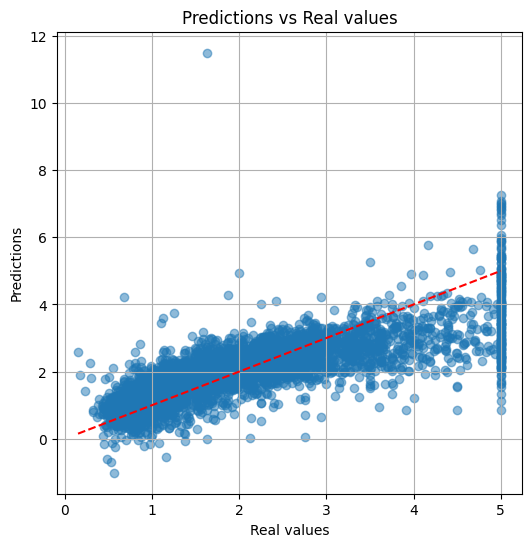

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real values')
plt.grid(True)
plt.show()

## Conclusion

Choosing the right metric depends on the goal of the problem. Some examples are:

- Medical classification: Recall > Precision
- Fraud detection: Precision > Recall
- General classification: F1 Score
- Model comparison: ROC AUC

In regression:
- MAE if you care about average errors
- RMSE if you heavily penalize large errors
- R² if you want to see how good the model is